In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cancer=pd.read_csv('haberman.csv')
print(cancer.shape)
print(cancer.columns)
print(cancer.head(5))

(305, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')
   age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1


# observations

1. there are 4 columns named ['age', 'year', 'nodes', 'status']

2. age,year,nodes are independent variables. status is dependent(class) variable.

age: age of the patient at the time of opeartion

year: year of operation

nodes: number of positive axillary nodes detected

status: survival status  
1->lived more than 5 years after operation

2->lived less than 5 years after operation


In [4]:
cancer['status'].value_counts()       #

1    225
2     80
Name: status, dtype: int64

In [4]:
#this is a slightly imbalnced dataset.we need to the computations based on the status

# 2D scatter plots

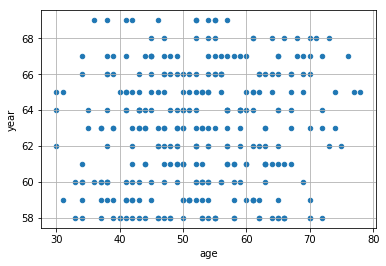

In [5]:
x,y='age','year'
cancer.plot(x,y,kind='scatter')
plt.grid()
plt.show()

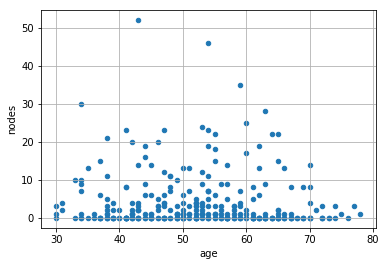

In [6]:
x,y='age','nodes'
cancer.plot(x,y,kind='scatter')
plt.grid()
plt.show()

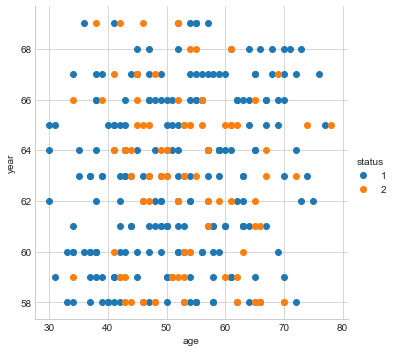

In [8]:
sns.set_style('whitegrid')
sns.FacetGrid(cancer,hue='status',size=5).map(plt.scatter,'age','year').add_legend()
plt.show()

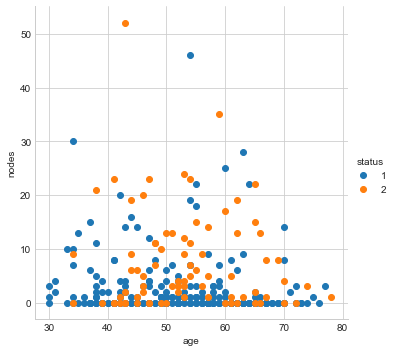

In [9]:
sns.set_style('whitegrid')
sns.FacetGrid(cancer,hue='status',size=5).map(plt.scatter,'age','nodes').add_legend()
plt.show()

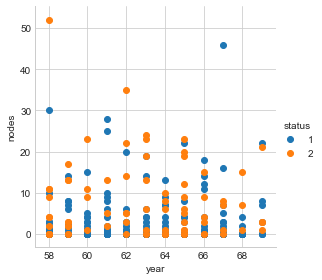

In [10]:
sns.set_style('whitegrid')
sns.FacetGrid(cancer,hue='status',size=4).map(plt.scatter,'year','nodes').add_legend()
plt.show()

# observations

this dataset is imbalanced. status=1 has 225 and status=2 has 80 values only.

from the above grpah,we cant clearly visualize what is happening.we dont know what are the variables that are involved in the calculation of result.

so,we have to use pairplots to find the best variables for our model


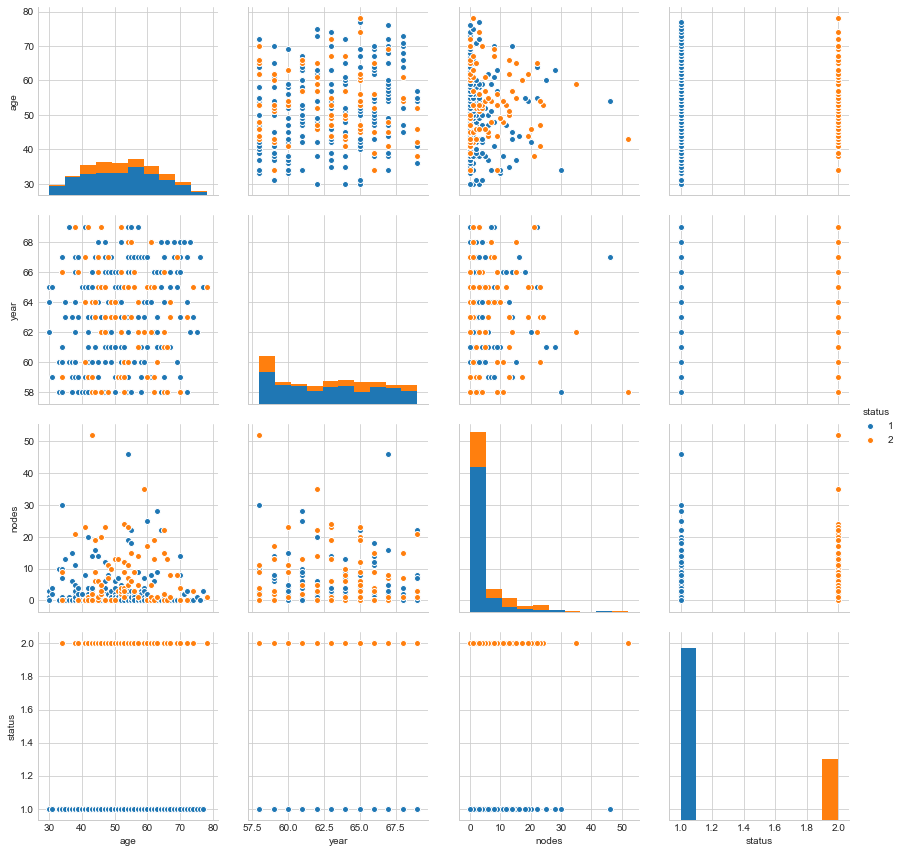

In [13]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(cancer,hue='status',size=3)
plt.show()

In [19]:
#we seperated status=1 and status=2 for our analysis

status1=cancer.loc[cancer['status']==1]
print(status1)
status2=cancer.loc[cancer['status']==2]
print(status2)

     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
5     33    58     10       1
6     33    60      0       1
9     34    58     30       1
10    34    60      1       1
11    34    61     10       1
12    34    67      7       1
13    34    60      0       1
14    35    64     13       1
15    35    63      0       1
16    36    60      1       1
17    36    69      0       1
18    37    60      0       1
19    37    63      0       1
20    37    58      0       1
21    37    59      6       1
22    37    60     15       1
23    37    63      0       1
25    38    59      2       1
26    38    60      0       1
27    38    60      0       1
28    38    62      3       1
29    38    64      1       1
30    38    66      0       1
31    38    66     11       1
32    38    60      1       1
..   ...   ...    ...     ...
265   65    59      2       1
266   65  

# univariate analysis (histogram, PDF, CDF)

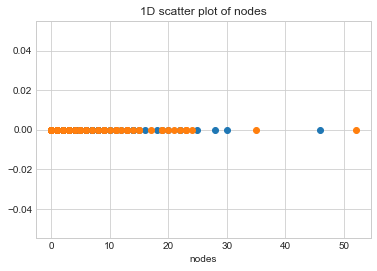

In [20]:
#1-D scatter plot

plt.plot(status1['nodes'],np.zeros_like(status1['nodes']),'o')
plt.plot(status2['nodes'],np.zeros_like(status2['nodes']),'o')
plt.xlabel('nodes')
plt.title('1D scatter plot of nodes')
#plt.legend()
plt.show()



C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


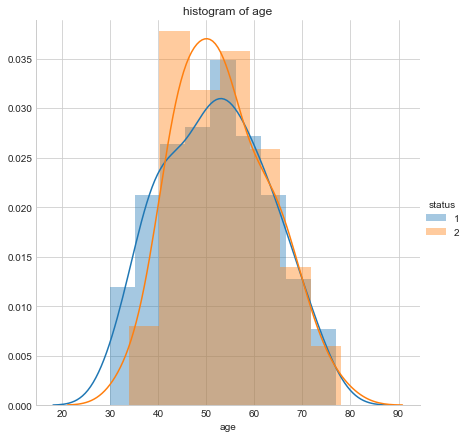

In [15]:
#histogram of age

sns.FacetGrid(cancer,hue='status',size=6).map(sns.distplot,'age').add_legend()
plt.title('histogram of age')
plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


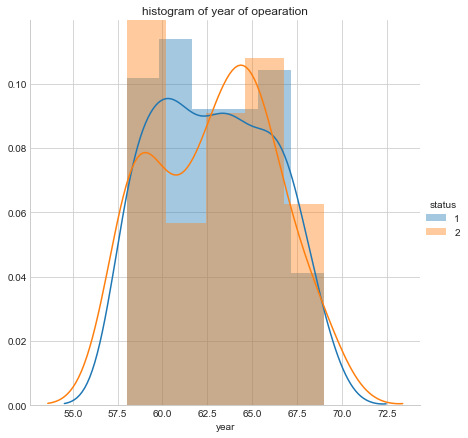

In [16]:
#histogram of year

sns.FacetGrid(cancer,hue='status',size=6).map(sns.distplot,'year').add_legend()
plt.title('histogram of year of opearation')
plt.show()

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


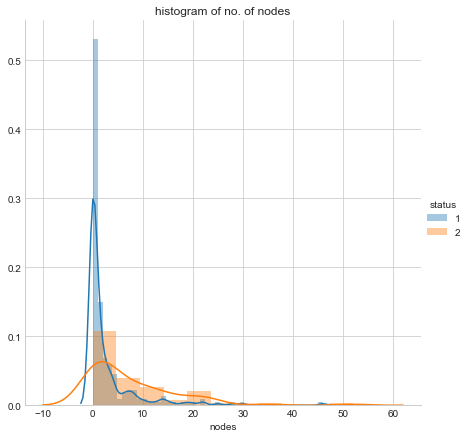

In [17]:
#histogram of nodes

sns.FacetGrid(cancer,hue='status',size=6).map(sns.distplot,'nodes').add_legend()
plt.title('histogram of no. of nodes')
plt.show()

# observations
the above graph(histogram of nodes) is giving some clear picture in differentiating both statuses. 

In the above two graphs(histogrmas of age and year),both are mixed up and we cant clearly understand them.

so,we use nodes column for our analysis

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


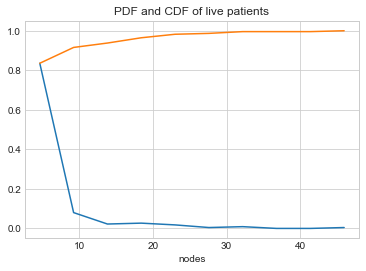

In [25]:
#PDF of status=1
counts1,bin_edges1=np.histogram(status1['nodes'],bins=10,density = True)
pdf1=counts1/(sum(counts1))
print(pdf1);
print(bin_edges1)

#cumulative distribution function of status=1
cdf1=np.cumsum(pdf1)
plt.plot(bin_edges1[1:],pdf1)
plt.plot(bin_edges1[1:],cdf1)
plt.xlabel('nodes')
plt.title('PDF and CDF of live patients')
plt.show()


# observations from PDF,CDF of status1

1. 82% of the people who lived have nodes<=5.
2. 10% to 15% of the people lived have nodes>=5 and nodes<=10.
3. 5% of the people lived have nodes>=12 and nodes<=20.
4. 1% to 2% of the people lived have nodes>=25

[0.5625 0.15   0.1375 0.05   0.075  0.     0.0125 0.     0.     0.0125]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


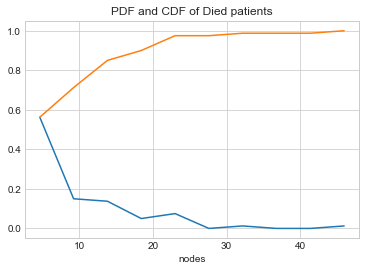

In [24]:
#PDF of status=2
counts2,bin_edges2=np.histogram(status2['nodes'], bins=10, density = True)
pdf2=counts2/(sum(counts2))
print(pdf2);
print(bin_edges2)

#cumulative distribution function of status=2
cdf2=np.cumsum(pdf2)
plt.plot(bin_edges1[1:],pdf2)
plt.plot(bin_edges1[1:],cdf2)
plt.xlabel('nodes')
plt.title('PDF and CDF of Died patients')
plt.show()


# observations from PDF,CDF of status2

1. 55% of the people who died have nodes<=10
2. 18% of the people who died have nodes>=7 and nodes<=10
3. 5% of the people who died have nodes>=10 and nodes<=17
4. 1% to 2% of the people who died have nodes>=25


In [30]:
#finding mean and standard deviation for status=1

print('mean of the nodes of the people who survived:',np.mean(status1['nodes']))    
#we came to know that the average nodes of people who survived for morethan 5 years after operation is 2.7. 


print('outlier mean:',np.mean(np.append(status1['nodes'],1000)))      
#mean has a problem with outlier values


#finding mean and standard deviation for status=2
print('mean of the nodes of the people who died:',np.mean(status2['nodes']))    
#we came to know that the average nodes of people who died within 5 years after operation is 7.525. 


mean of the nodes of the people who survived: 2.7911111111111113
outlier mean: 7.20353982300885
mean of the nodes of the people who died: 7.525


In [29]:
# if somebody mistakenly entered 1000 as no.of nodes,the mean value changes from 2.7 to 7.2. 
#this may cuase problems if more ouliers like this appears in our data

In [31]:
print(np.std(status1['nodes']))       #people with <=6 nodes have chances to live
print(np.std(status2['nodes']))       #people with >=9 nodes may die

5.857258449412131
9.165117293302908


# observations
As we know that mean and standard deviation has a problem with outliers. if we add some outlier value(value which is very larger than actual mean),the mean value changes.but this mean value is wrong.

so,we have to go with median to take average age of people in both categories

In [42]:
#median

print('median of the no. of nodes of people who survived:',np.median(status1['nodes']))    
# people with avg. 0 nodes will live

print('median of the no. of nodes of people who died:',np.median(status2['nodes']))         
# people with avg. 4 nodes will die

median of the no. of nodes of people who survived: 0.0
median of the no. of nodes of people who died: 4.0


In [35]:
#standard deviation
print(np.std(status1['nodes']))    # 5+-0 nodes -> live  (5 nodes)
print(np.std(status2['nodes']))    # 9+-4 nodes -> die   (5-13 nodes)

5.857258449412131
9.165117293302908


In [36]:
#quantiles
print(np.percentile(status1['nodes'],np.arange(0,100,25)))       

print(np.percentile(status2['nodes'],np.arange(0,100,25)))

[0. 0. 0. 3.]
[ 0.    1.    4.   11.25]


# observations

1. 75% chances for the people who have 3 nodes to live.
2. 75% chances for the people who have 11 nodes to die.

In [41]:
#90th quantile

print(np.percentile(status1['nodes'],90))           # 90% chances for people with 8 nodes to live 
print(np.percentile(status2['nodes'],90))           # 90% chances for people with 20 nodes to die.

8.0
20.10000000000001


In [40]:
from statsmodels import robust
print('median absolute deviation:')
print('status1:',robust.mad(status1['nodes']))
print('status2:',robust.mad(status2['nodes']))

median absolute deviation:
status1: 0.0
status2: 5.930408874022408


# box plot and violin plots

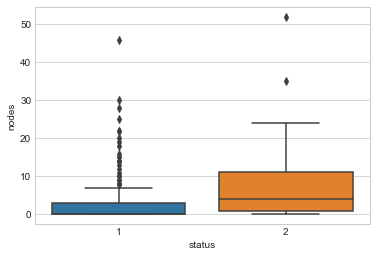

In [47]:
#box plot

x,y='status','nodes'
bp=sns.boxplot(x,y,data=cancer)
#print(bp)
plt.show()

# observations
Status1(to live)
1. 50% to 75% chances to live with nodes=0

Status2(to die)
1.   0-1 nodes(25%)
2.   2-5 nodes(50%)
3.   6-11 nodes(75%)
   

AxesSubplot(0.125,0.125;0.775x0.755)


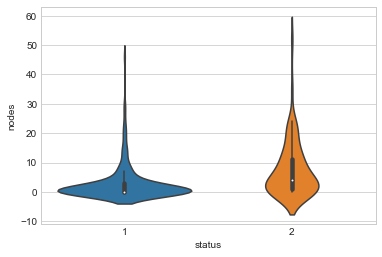

In [49]:
#viloin plot (combination of boxplot and histogram)

vp=sns.violinplot(x,y,data=cancer)
print(vp)

# contour plot

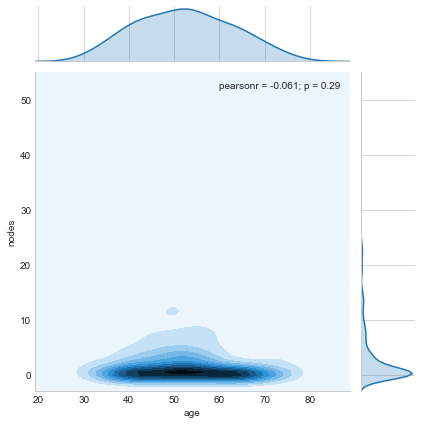

In [52]:
#2D density plot

x='age'    #age can also be used as an alternate to nodes
y='nodes'
sns.jointplot(x,y,data=cancer,kind="kde");
plt.show();


# observations
1. people with age in range 40 to 70 and nodes <0 have chances to live.

2. people with age in range 70 and nodes>10 may die

# Final Conclusions

1. Nodes attribute plays key role in this analysis
2. we used Node varible in our univariate analysis to find the number of nodes needed to live or die.
3. After finding median,mad we got:
            i)5 nodes to live
            ii) 9-13 nodes may die
4. people with more nodes(>5) have more chances to die.
5. people with less nodes(<2) have more chances to live.


# sample code

if(nodes<=0): print('live')
    
elif(nodes>0 and nodes<=7): print('may live')

elif(nodes>=5 && nodes<=9): print('may die')

else: print('die')

or if we consider age also:  (from contour plot)

if((age>=40 and age<=70) and (if nodes<=0)): print('live')

elif((age>=40 and age<=70) and (if nodes<=7)): print('may live')

elif((age>70) and (nodes<=0)): print('may die')

else: print('die')


we can use age also for our analysis. age is also giving same result(in terms of age needed to live or die) 